In [12]:
import numpy as np
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features = 2, n_informative = 1, n_redundant = 0, n_classes = 2, n_clusters_per_class = 1, random_state = 41, hypercube = False, class_sep = 10)

In [13]:
import matplotlib.pyplot as plt

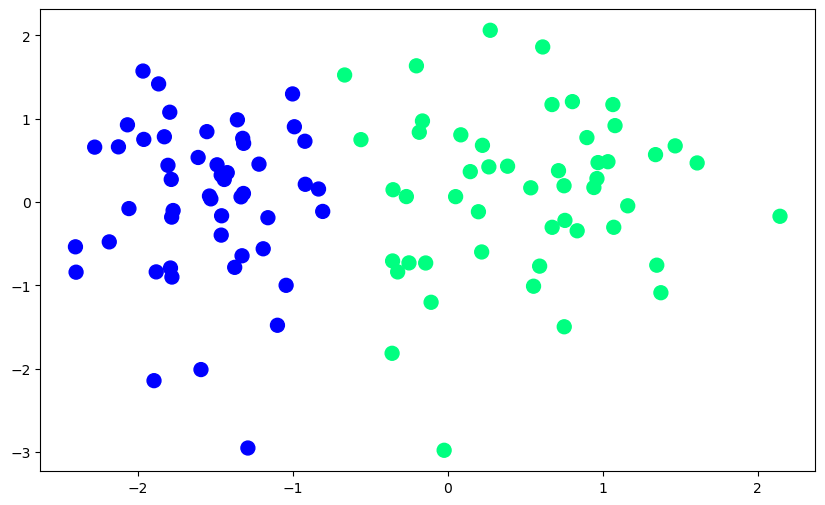

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter', s=100)

In [19]:
def perceptron(X, y):

    X = np.insert(X, 0, 1, axis=1)
    weight = np.ones(X.shape[1])

    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0, 100)
        y_hat = step(np.dot(X[j], weight))
        weight = weight + lr * (y[j] - y_hat) * X[j]

    return weight[0], weight[1:]

In [20]:
def step(z):
    return 1 if z > 0 else 0

In [21]:
intercept_, coef_ = perceptron(X, y)

In [22]:
print(f"Intercept: {intercept_}")
print(f"Coefficient: {coef_}")

Intercept: 0.9
Coefficient: [1.36563523 0.10365821]


In [23]:
m = -(coef_[0] / coef_[1])
b = -(intercept_ / coef_[1])

In [24]:
x_input = np.linspace(-3, 3, 100)
y_input = m * x_input + b

(-3.0, 2.0)

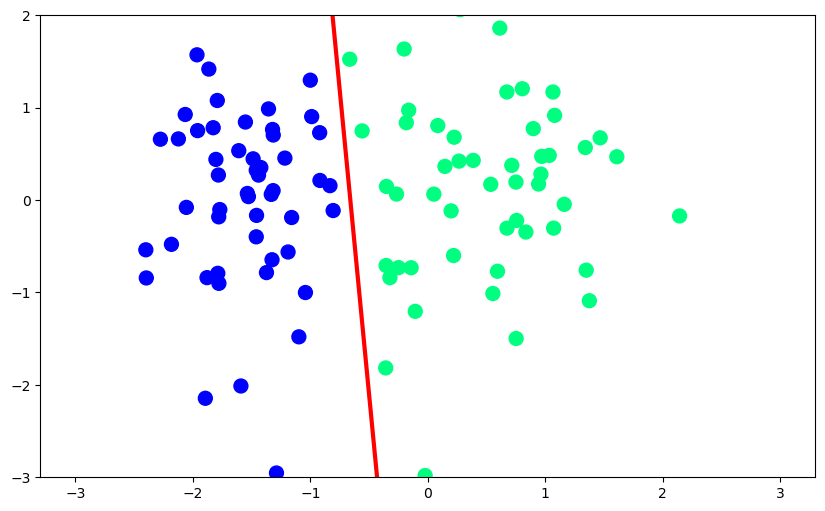

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.scatter(X[:, 0], X[:, 1], c = y, cmap = 'winter', s=100)
plt.ylim(-3, 2)

In [30]:
def perceptron(X,y):
    m=[]
    b=[]

    X = np.insert(X, 0, 1, axis=1)
    weight = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j], weight))
        weight = weight + lr * (y[j] - y_hat) * X[j]

        m.append(-(weight[1] / weight[2]))
        b.append(-(weight[0] / weight[2]))

    return m,b

In [31]:
m,b =perceptron(X, y)

In [32]:
%matplotlib inline
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt

In [43]:
fig, ax = plt.subplots(figsize=(9, 5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i * m[0] + b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)

In [45]:
from sklearn.linear_model import LogisticRegression

lor = LogisticRegression()
lor.fit(X, y)

LogisticRegression()

In [46]:
m = -(lor.coef_[0][0] / lor.coef_[0][1])
b = -(lor.intercept_ / lor.coef_[0][1])

In [47]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

In [48]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

(-3.0, 2.0)